<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/02-Machine-Learning/notebooks/11-Regresion-Logistica-SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

En esta notebook usaremos la implementación de scikit-learn de la regresión logística. Primero veremos dos ejemplos didacticos para entender el funcionamiento del clasificador. Después, resolveremos un ejemplo usando el conjunto de datos de dígitos escritos a mano.

## Ejemplo 1(a)

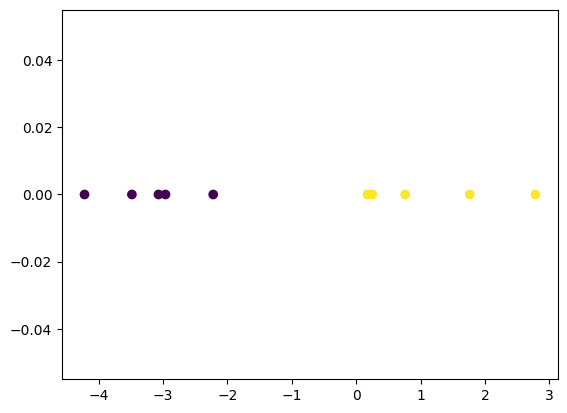

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=10,
                  n_features=1,
                  centers=2,
                  random_state=17)

plt.figure()
plt.scatter(x=X,y=[0 for x in X],c=y)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X,y)

probs = lr.predict_proba(X)
probs[:,1]

array([0.97715113, 0.19215937, 0.08301418, 0.99384032, 0.01729115,
       0.07289983, 0.84338764, 0.92040628, 0.85597763, 0.04387508])

In [ ]:
from math import e

def f(x):
    return w0+w1*x

def plog(x):
    return 1/(1+e**(-f(x)))

w0, w1 = lr.intercept_, lr.coef_[0]
xmin, xmax = np.min(X), np.max(X)
xs = np.linspace(xmin,xmax,100)

plt.figure()
plt.scatter(x=X,y=[0 for x in X],c=y,s=85)
plt.plot(xs,[plog(x) for x in xs],color='black')
plt.scatter(x=X,y=probs[:,1],c=y,marker='+',s=85)
plt.axhline(y=0.5,color='gray',linestyle='--')
plt.yticks([0,0.5,1])
plt.show()

## Ejemplo 1(b)

En este ejemplo, clasificamos un pequeño conjunto de datos en 2 dimensiones

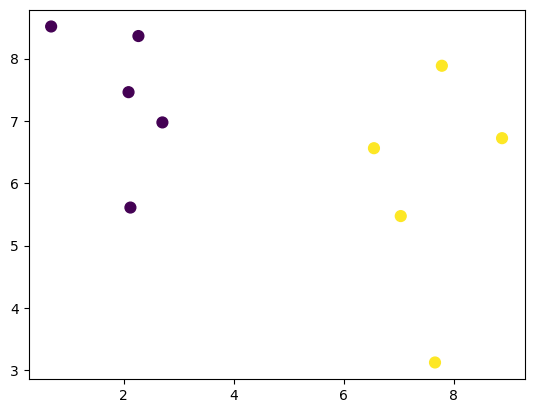

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=10,
                  n_features=2,
                  centers=2,
                  random_state=20)

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=60)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X,y)

Podemos acceder al intercepto y los coeficientes

In [ ]:
w0, w1, w2 = lr.intercept_, lr.coef_[0,0], lr.coef_[0,1]

Veamos las probabilidades

In [ ]:
probs = lr.predict_proba(X)
probs

Grafiquemos y visualicemos las probabilidades

In [ ]:
from math import e
from matplotlib import cm
from itertools import product

def f(x,y):
    return w0+w1*x+w2*y

def plog(x,y):
    return 1/(1+e**(-f(x,y)))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},dpi=300)

xmin, xmax = np.min(X[:,0]), np.max(X[:,0])
ymin, ymax = np.min(X[:,1]), np.max(X[:,1])

xs = np.linspace(xmin, xmax,50)
ys = np.linspace(ymin, ymax, 50)
Xs, Ys = np.meshgrid(xs, ys)
Z = np.array([plog(x,y) for x,y in zip(Xs,Ys)])

surf = ax.plot_surface(Xs, Ys, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.plot_surface(Xs, Ys, 0.5+np.zeros_like(Z),
                       linewidth=0, antialiased=False,alpha=0.4,color='gray')
ax.scatter(X[:,0],X[:,1],[0 for x in X],c=y,s=60)
ax.scatter(X[:,0],X[:,1],[plog(x[0],x[1]) for x in X],c='black',s=60,marker='x')
plt.show()

## Ejemplo 2(a)

En el siguiente ejemplo vemos cómo generar fronteras de decisión más complejas.

In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/binary-classification-data.csv'
df = pd.read_csv(url,header=None)
df

,0,1,2
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


Observemos los datos

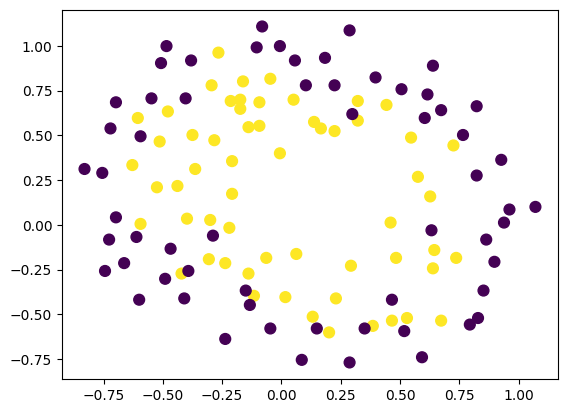

In [ ]:
import matplotlib.pyplot as plt

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=60)
plt.show()

In [ ]:
#@title Funciones para graficas las fronteras de decisión
import numpy as np

def make_meshgrid(x, y, h=.02):
    '''
    función para hacer la malla de puntos para colorear las regiones de decisión,
    la malla de puntos abarca la región donde se encuentran los puntos (x,y)
    'h' es el tamaño de paso
    '''
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Hacemos una regresión logística con los parámetros por default y vemos su accuracy en el conjunto de entrenamiento.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X,y)
lr.score(X,y)

0.92

Hacemos una regresión logística con polinomial features y vemos su accuracy en el conjunto de entrenamiento

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

p_feats = PolynomialFeatures(2,include_bias=False)
log_reg = LogisticRegression(penalty='l2', C=1, solver='newton-cholesky')

pl = Pipeline([('pf',p_feats),
               ('clf',log_reg)])
pl.fit(X,y)
pl.score(X,y)

0.8135593220338984

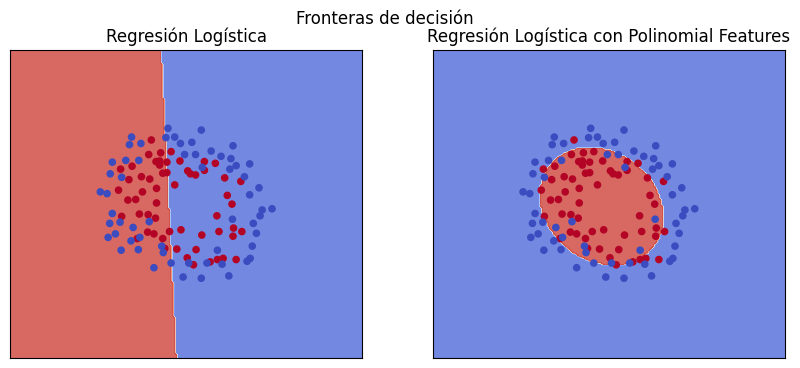

In [ ]:
xx, yy = make_meshgrid(X[:,0], X[:,1])

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, lr, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Regresión Logística')

plot_contours(ax2, pl, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Regresión Logística con Polinomial Features')

plt.show()

## Ejemplo 2(b)

En este ejemplo veremos el efecto de la regularización como herramienta para prevenir el *overfitting*. Veremos un dataset con muchas features y varias de ellas correlacionadas.

In [ ]:
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=300,
#                            n_features=60,
#                            n_informative=20,
#                            n_repeated=3,
#                            n_redundant=20,
#                            n_classes=2,
#                            n_clusters_per_class=3,
#                            class_sep = 0.5,
#                            random_state=49)

X, y = make_classification(n_samples=500,
                           n_features=100,
                           n_informative=20,
                           n_repeated=3,
                           n_redundant=20,
                           n_classes=2,
                           class_sep = 0.5,
                           random_state=57)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=1001)

Realicemos el entrenamiento. El rendimiento parece ser bueno en el conjunto de entrenamiento pero en el conjunto de prueba es malo. **Esta es una señal de overfitting**.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty=None)
lr.fit(X_train,y_train)
print(f"Training score: {lr.score(X_train,y_train)}")
print(f"Test score: {lr.score(X_test,y_test)}")

Training score: 0.832
Test score: 0.632


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


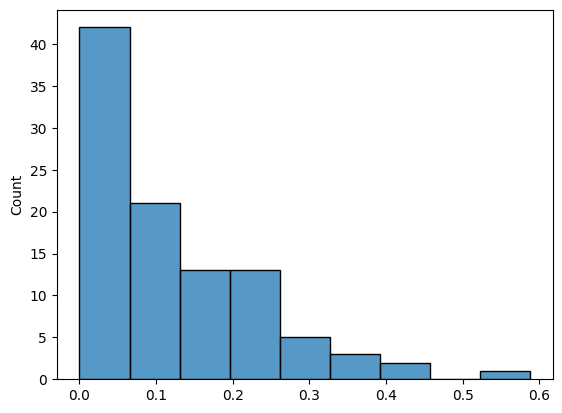

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

normas = np.array([np.linalg.norm(x) for x in lr.coef_[0]])

plt.figure()
sns.histplot(normas)
plt.show()

Usamos un clasificador con regularización

In [ ]:
lr2 = LogisticRegression(C=0.1,penalty='l1',solver='liblinear')
lr2.fit(X_train,y_train)
print(f"Training score: {lr2.score(X_train,y_train)}")
print(f"Test score: {lr2.score(X_test,y_test)}")

Training score: 0.7733333333333333
Test score: 0.688


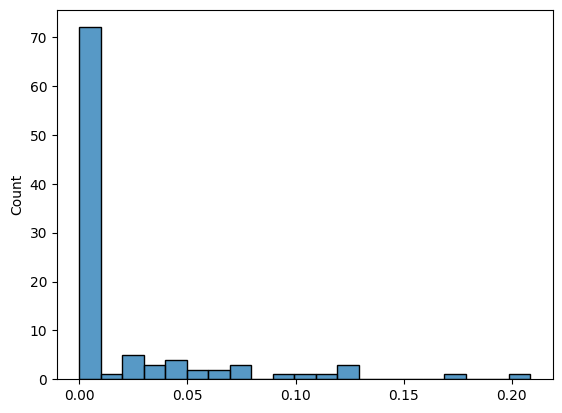

In [ ]:
import seaborn as sns

normas = np.array([np.linalg.norm(x) for x in lr2.coef_[0]])

plt.figure()
sns.histplot(normas)
plt.show()

Podemos ver que hay varios coeficientes que son exactamente cero. Observar que el número es parecido al número de features redundantes + número de features repetidas

In [ ]:
coefs = lr2.coef_
num_zeros = coefs[coefs==0].shape[0]
print(f"Número de coeficientes = 0: {num_zeros}")

Número de coeficientes = 0: 64


Veamos el score ROC-AUC. Observa que **sólo usamos la segunda columna del arreglo de probabilidades**, son las probabilidades de que pertenezca a la clase positiva.

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_probs = lr2.predict_proba(X_test)
score = roc_auc_score(y_test, y_pred_probs[:,1])
from sklearn.metrics import roc_auc_scoreprint(f"ROC-AUC score: {score}")

ROC-AUC score: 0.7730769230769231


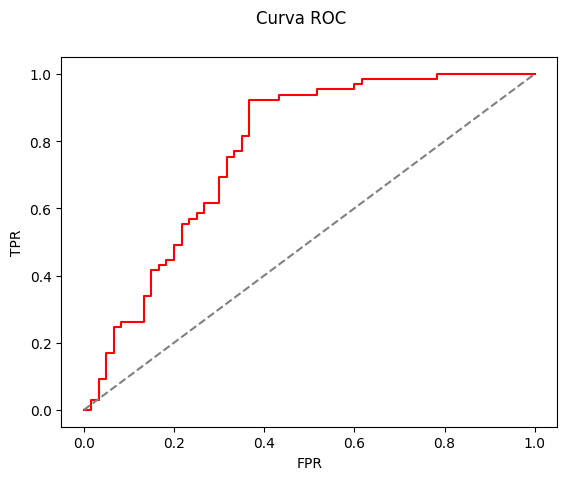

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])

plt.figure()
plt.suptitle("Curva ROC") 
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Ejemplo 3

Usaremos el dataset de dígitos escritos a mano. Tenemos dos versiones:

* Usando `keras`, es el dataset MNIST completo. Son 70,000 imágenes de $28\times 28$, divididas en 60,000 de entrenamiento y 10,000 de prueba.
* Usando `sklearn`, es una versión reducida. Son 1797 imágenes de $8\times 8$.

Por practicidad, usaremos la segunda opción.

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Obtenemos el dataset

In [ ]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
X.shape

(1797, 64)

Veamos cómo se ve una instancia del conjunto de datos

In [ ]:
X[28]

array([ 0.,  0., 10., 11.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15., 13.,
       13.,  1.,  0.,  0.,  0.,  8., 11.,  0., 14.,  4.,  0.,  0.,  0.,
        0., 13., 15., 13.,  0.,  0.,  0.,  1., 11., 16., 16.,  0.,  0.,
        0.,  0.,  1., 15.,  3.,  9., 10.,  0.,  0.,  0.,  0., 14.,  6.,
       15., 10.,  0.,  0.,  0.,  0.,  8., 14.,  7.,  1.,  0.,  0.])

In [ ]:
X[28].reshape(8,8)

array([[ 0.,  0., 10., 11.,  4.,  0.,  0.,  0.],
       [ 0.,  0., 10., 15., 13., 13.,  1.,  0.],
       [ 0.,  0.,  8., 11.,  0., 14.,  4.,  0.],
       [ 0.,  0.,  0., 13., 15., 13.,  0.,  0.],
       [ 0.,  1., 11., 16., 16.,  0.,  0.,  0.],
       [ 0.,  1., 15.,  3.,  9., 10.,  0.,  0.],
       [ 0.,  0., 14.,  6., 15., 10.,  0.,  0.],
       [ 0.,  0.,  8., 14.,  7.,  1.,  0.,  0.]])

Hacemos la división en entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=128)
X_train.shape, X_test.shape

((1437, 64), (360, 64))

Mostramos algunas instancias de entrenamiento.

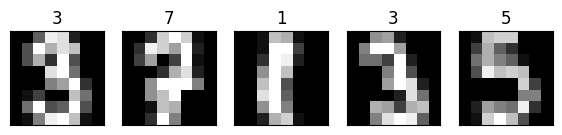

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,2))
for idx, (image, label) in enumerate(zip(X_train[:5], y_train[:5])):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title(label)

Usaremos la implementación de scikit-learn ([documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).

In [ ]:
from sklearn.linear_model import LogisticRegression

⭕ Realiza el entrenamiento de un módelo de Regresión Lineal y realiza las predicciones sobre el conjunto de prueba. Reporta las métricas de rendimiento y la mátriz de confusión.

Puedes usar los parámetros que gustes para el modelo.

In [ ]:
lr = LogisticRegression(solver = 'lbfgs',penalty='l2', C=0.1)
lr.fit(X_train,y_train)

print(f"Training accuracy: {lr.score(X_train,y_train)}")
print(f"Test accuracy: {lr.score(X_test,y_test)}")

Training accuracy: 1.0
Test accuracy: 0.9611111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = lr.predict(X_test)
y_pred.shape

(360,)

In [ ]:
y_pred_probs = lr.predict_proba(X_test)
y_pred_probs.shape

(360, 10)

Veamos las probabilidades predichas y la etiqueta predicha

In [ ]:
print(y_pred_probs[0])
print(y_pred[0])

[1.88098790e-07 2.14725757e-05 1.46232627e-11 1.07640954e-11
 9.99959833e-01 1.32212090e-11 5.71179477e-06 1.14731669e-05
 1.32088170e-06 3.07055851e-12]
4


Como son probabilidades, la suma de las componentes es 1

In [ ]:
np.sum(y_pred_probs[0])

1.0000000000000002

### Validación cruzada

Usemos validación cruzada para evaluar el entrenamiento de nuestro modelo, [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, cv=5)

In [ ]:
print(scores)
print(np.mean(scores))

[0.96180556 0.96527778 0.97212544 0.96167247 0.97560976]
0.9672981997677119


### ROC-AUC Score

Usaremos el area bajo la curva ROC como métrica de rendimiento del clasificador. Para esto necesitamos las probabilidades de las predicciones.

Hay varias maneras de calcularlo:

* Si el clasificador tiene un método `predict_proba`, usamos [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).
* Si no, usamos [RocCurveDisplay.from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator)

In [ ]:
y_pred_probs = lr.predict_proba(X_test)
y_pred_probs.shape

(360, 10)

Cuando se trata de un problema multiclase podemos escoger el enfoque `ovr` (one-vs-rest) o `ovo` (one-vs-one). En este caso, no se puede graficar directamente la curva ROC.

In [ ]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, y_pred_probs,multi_class='ovr')
print(f"ROC-AUC score: {score}")

ROC-AUC score: 0.9992697958571902


## ⭕ Práctica "final" de clasificación 

Retomar el dataset de la sesión pasada y probar los siguientes clasificadores:

* Regresión Logística
* SVM
* Decision Tree
* Random Forest

Recuerda que hay algunos valores faltantes. 

1. ¿Qué clasificador tiene mejor rendimiento en este dataset? Para esto toma en cuenta el accuracy y el F1-score como métricas de rendimiento. 

Como siempre, puedes usar cualquier técnica de selección de features, escalamiento, regularización que desees.

In [ ]:
import pandas as pd
import numpy as np

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/diabetes.csv'
df = pd.read_csv(url,index_col=0)
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Hay más clasificadores que es importante revisar. Con las herramientas que ya cuentas, ya puedes revisarlos por tu cuenta:

* [K-nearest neighbors classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
* [Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)
* [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)
* [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)
* ...

[Más información](https://scikit-learn.org/stable/supervised_learning.html), [comparación](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

In [ ]:
from sklearn.impute import SimpleImputer

features_with_missing_values = ['glucose','skin','bmi']
missing_values_columns = df.loc[:,features_with_missing_values].values

imputador = SimpleImputer(missing_values=0,strategy='mean')
imputed_values_columns = imputador.fit_transform(missing_values_columns)

df[features_with_missing_values] = imputed_values_columns
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148.0,72,35.00000,0,33.6,0.627,50,1
1,1,85.0,66,29.00000,0,26.6,0.351,31,0
2,8,183.0,64,29.15342,0,23.3,0.672,32,1
3,1,89.0,66,23.00000,94,28.1,0.167,21,0
4,0,137.0,40,35.00000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.00000,180,32.9,0.171,63,0
764,2,122.0,70,27.00000,0,36.8,0.340,27,0
765,5,121.0,72,23.00000,112,26.2,0.245,30,0
766,1,126.0,60,29.15342,0,30.1,0.349,47,1


In [ ]:
feature_names = df.columns.to_list()[:-1]

print(f"Nombres de las features: {feature_names}")

Nombres de las features: ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']


Obtenemos los conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X = df.loc[:,feature_names].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Definimos un pipeline con selector de features, escalador y regresión logística

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# selector = SelectKBest(k=5)
selector = VarianceThreshold(0.25)
scaler = MinMaxScaler()
clf = LogisticRegression() 

pl = Pipeline([('selector',selector),
               ('escalador',scaler),
               ('clasificador',clf)])

pl.fit(X_train,y_train)

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.25)),
                ('escalador', MinMaxScaler()),
                ('clasificador', LogisticRegression())])

In [ ]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(pl,X_train,y_train)

print(f"Accuracy en el conjunto de entrenamiento: {pl.score(X_train,y_train)}")
print(f"CV Accuracy en el conjunto de entrenamiento: {np.mean(cvs)}")
print(f"Accuracy en el conjunto de prueba: {pl.score(X_test,y_test)}")

Accuracy en el conjunto de entrenamiento: 0.7579143389199255
CV Accuracy en el conjunto de entrenamiento: 0.7616649359640014
Accuracy en el conjunto de prueba: 0.7748917748917749


Hacemos grid search:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    # "selector__k": [2,3,4,5,6],
    "selector__threshold": [0,0.1,0.2,0.5],
    "clasificador__C": [0.1,0.5,1,2],
    "clasificador__solver": ['lbfgs','newton-cg','sag'],
    "clasificador__penalty": [None,'l2']
}

search = GridSearchCV(pl, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.769):
{'clasificador__C': 1, 'clasificador__penalty': 'l2', 'clasificador__solver': 'lbfgs', 'selector__threshold': 0}


In [ ]:
selector = VarianceThreshold(0)
scaler = MinMaxScaler()
clf = LogisticRegression(C=1,penalty='l2',solver='lbfgs') 

best_pl = Pipeline([('selector',selector),
               ('escalador',scaler),
               ('clasificador',clf)])

best_pl.fit(X_train,y_train)

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('escalador', MinMaxScaler()),
                ('clasificador', LogisticRegression(C=1))])

In [ ]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(best_pl,X_train,y_train)

print(f"Accuracy en el conjunto de entrenamiento: {best_pl.score(X_train,y_train)}")
print(f"CV Accuracy en el conjunto de entrenamiento: {np.mean(cvs)}")
print(f"Accuracy en el conjunto de prueba: {best_pl.score(X_test,y_test)}")

Accuracy en el conjunto de entrenamiento: 0.776536312849162
CV Accuracy en el conjunto de entrenamiento: 0.7691415714780201
Accuracy en el conjunto de prueba: 0.7792207792207793


Veamos varios clasificadores al mismo tiempo. En cada clasificador realizamos un grid search y obtenemos el accuracy-cv para el entrenamiento y el accuracy en el conjunto de prueba.

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

selector = SelectKBest()
scaler = MinMaxScaler()
    

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()
nb = GaussianNB()

params_lr = {
            "selector__k": [2,3,4,5,6],
            "clasificador__C": [0.1,0.5,1,2],
            "clasificador__solver": ['lbfgs','newton-cg','sag'],
            "clasificador__penalty": [None,'l2']}
params_dt = {
            "selector__k": [2,3,4,5,6],
            "clasificador__criterion": ['gini','entropy','log_loss'],
            "clasificador__max_depth": [None,10,20],
            "clasificador__min_samples_split": [2,3,4]}
params_rf = {
            "selector__k": [2,3,4,5,6],
            "clasificador__n_estimators": [25,50,75,100],
            "clasificador__max_depth": [None,5,10]
            }
params_svm = {
            "selector__k": [2,3,4,5,6],
            "clasificador__C": [0.5,1,2],
            "clasificador__kernel": ['linear', 'poly', 'rbf']
            }
params_nb = {
            "selector__k": [2,3,4,5,6]
            }

clasificadores = [lr,dt,rf,svm,nb]
params_grids = [params_lr,params_dt,params_rf,params_svm,params_nb]

training_cv_accs = []
testing_accs = []

for j,(clf,param_grid) in enumerate(zip(clasificadores,params_grids)):
    pl = Pipeline([('selector',selector),
                ('escalador',scaler),
                ('clasificador',clf)])
    search = GridSearchCV(pl, param_grid, n_jobs=-1)
    search.fit(X_train, y_train)
    best_option = search.best_estimator_
    cvs = cross_val_score(best_option,X_train,y_train)
    training_cv_accs.append(np.mean(cvs))
    y_pred = best_option.predict(X_test)
    testing_accs.append(accuracy_score(y_test,y_pred))
    print(f"Clasificador {j+1} explorado")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

Clasificador 1 explorado
Clasificador 2 explorado
Clasificador 3 explorado
Clasificador 4 explorado
Clasificador 5 explorado


Veamos los resultados, ordenados por el accuracy de prueba.

In [ ]:
results_df = pd.DataFrame(data={
                        'clasificador':['LogReg','DT','RF','SVM','G Naive Bayes'],
                        'Training CV accuracy': training_cv_accs,
                        'Test Accuracy':testing_accs 
                        })
results_df.sort_values(by='Test Accuracy',ascending=False)

,clasificador,Training CV accuracy,Test Accuracy
3,SVM,0.765386,0.792208
0,LogReg,0.767255,0.779221
4,G Naive Bayes,0.752354,0.779221
2,RF,0.750467,0.753247
1,DT,0.730062,0.744589


Veamos los resultados, ordenados por el accuracy de prueba.

In [ ]:
results_df = pd.DataFrame(data={
                        'clasificador':['LogReg','DT','RF','SVM','G Naive Bayes'],
                        'Training CV accuracy': training_cv_accs,
                        'Test Accuracy':testing_accs 
                        })
results_df.sort_values(by='Test Accuracy',ascending=False)

,clasificador,Training CV accuracy,Test Accuracy
3,SVM,0.765386,0.792208
0,LogReg,0.767255,0.779221
4,G Naive Bayes,0.752354,0.779221
2,RF,0.750467,0.753247
1,DT,0.730062,0.744589
